In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns

In [8]:
train = pd.read_csv("Data/fashion-mnist_train.csv")
test = pd.read_csv("Data/fashion-mnist_test.csv")

In [9]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [10]:
train.head()
# Each image is 28x28, therefore 784 columns, 1 for label

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Labels and their descriptions:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [11]:
# converting the dataframe to a numpy array, so as to be able to visualize
train_arr = np.array(train)
test_arr = np.array(test)
train_arr

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

9

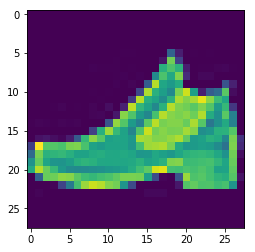

In [12]:
plt.imshow(train_arr[1, 1:].reshape(28, 28))
train_arr[1, 0]

1

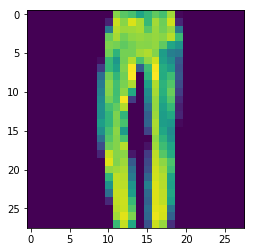

In [13]:
plt.imshow(test_arr[1, 1:].reshape(28, 28))
test_arr[1, 0]

In [14]:
train_X = train_arr[:, 1:]/255
train_y = train_arr[:, 0]

In [15]:
test_X = test_arr[:, 1:]/255
test_y = test_arr[:, 0]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
prediction = model.predict(test_X)

In [40]:
print(prediction)

[0 1 2 ... 8 6 2]


Logistic Regression prediction accuracy

In [42]:
print(metrics.accuracy_score(prediction, test_y)*100)

85.50999999999999


In [43]:
% % time
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(
    prediction, test_y)*100, 'percent')

The accuracy of the KNN is 85.84 percent
Wall time: 18min 2s


In [16]:
train_X.shape

(60000, 784)

In [17]:
train_X = train_X.reshape([train_X.shape[0], 28, 28, 1])
print(train_X.shape)
test_X = test_X.reshape([test_X.shape[0], 28, 28, 1])
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [21]:
from keras.models import Sequential
from keras.layers import InputLayer, Input, Reshape, MaxPooling2D, Conv2D, Flatten, Dense, Dropout

In [20]:
from keras.optimizers import Adam
optimizer = Adam(lr=1e-3)

In [118]:
classifier = Sequential()
# classifier.add(InputLayer(input_shape=(28*28,)))
classifier.add(Conv2D(32, (2, 2), input_shape=(28, 28, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=32, activation='relu'))
classifier.add(Dense(units=10, activation='sigmoid'))

classifier.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [119]:
%%time
classifier.fit(train_X, train_y, epochs=10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.8435 - acc: 0.7073
Epoch 2/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.4664 - acc: 0.8313
Epoch 3/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.4095 - acc: 0.8541
Epoch 4/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3763 - acc: 0.8663
Epoch 5/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3511 - acc: 0.8750
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.3343 - acc: 0.8808
Epoch 7/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.3237 - acc: 0.8858
Epoch 8/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3101 - acc: 0.8898
Epoch 9/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3008 - acc: 0.8920
Epoch 10/10
60000/60000 [==============================] - 18s 307us/step - loss: 

In [120]:
result = classifier.evaluate(x=test_X, y=test_y)

10000/10000 [==============================] - 2s 203us/step


In [121]:
result

[0.29936099045276643, 0.8918]

In [123]:
predictions = classifier.predict_classes(test_X)
predictions

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

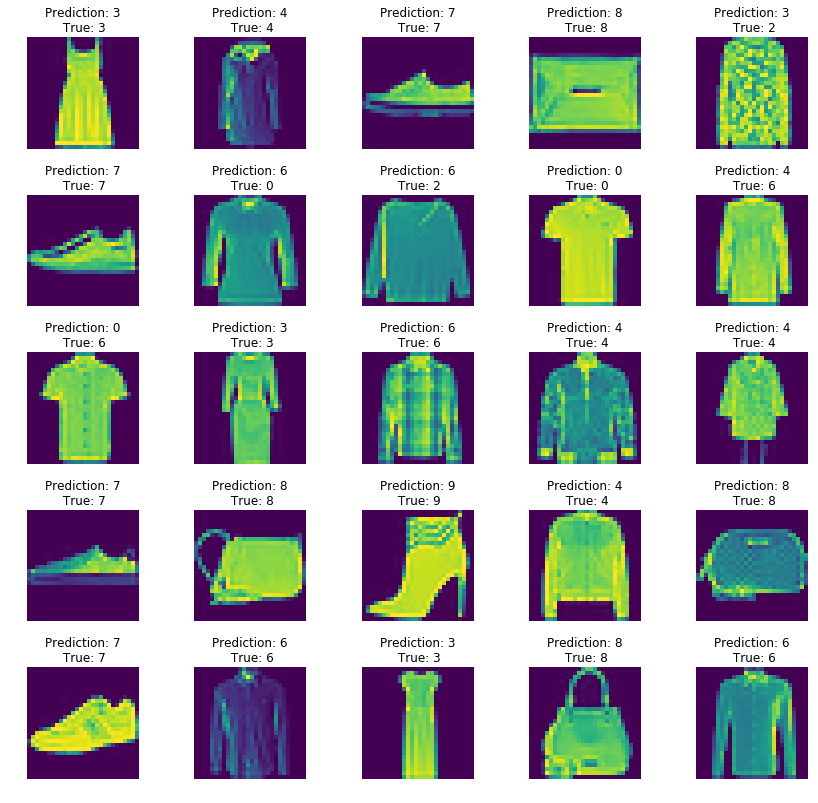

In [140]:
import random

fig, axes = plt.subplots(5, 5, figsize=(14, 14))
# axes is currently in multiple lists, ravel reshapes it to 1d (?)
axes = axes.ravel()

randnum = random.randint(0, 9975)

for i in range(25):
    axes[i].imshow(test_X[randnum + i].reshape(28, 28))
    axes[i].set_title('Prediction: %d\n True: %d' %
                      (predictions[randnum + i], test_y[randnum + i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [22]:
classifier = Sequential()
# classifier.add(InputLayer(input_shape=(28*28,)))
classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=10, activation='sigmoid'))

classifier.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
%%time
# Actually trained for 35 epochs, accidentally overwrote the first 10 (got to around 86%)
classifier.fit(train_X, train_y, epochs=25, batch_size=256)

Epoch 1/25
60000/60000 [==============================] - 32s 528us/step - loss: 0.3500 - acc: 0.8796
Epoch 2/25
60000/60000 [==============================] - 31s 519us/step - loss: 0.3337 - acc: 0.8846
Epoch 3/25
60000/60000 [==============================] - 32s 526us/step - loss: 0.3234 - acc: 0.8882
Epoch 4/25
60000/60000 [==============================] - 32s 527us/step - loss: 0.3140 - acc: 0.8918
Epoch 5/25
60000/60000 [==============================] - 32s 541us/step - loss: 0.3071 - acc: 0.8936
Epoch 6/25
60000/60000 [==============================] - 31s 525us/step - loss: 0.2947 - acc: 0.8998
Epoch 7/25
60000/60000 [==============================] - 32s 533us/step - loss: 0.2860 - acc: 0.9011
Epoch 8/25
60000/60000 [==============================] - 32s 527us/step - loss: 0.2814 - acc: 0.9039
Epoch 9/25
60000/60000 [==============================] - 31s 524us/step - loss: 0.2733 - acc: 0.9063
Epoch 10/25
60000/60000 [==============================] - 31s 521us/step - loss: 

In [28]:
result = classifier.evaluate(x=test_X, y=test_y)
result[1]

10000/10000 [==============================] - 4s 392us/step


0.9225

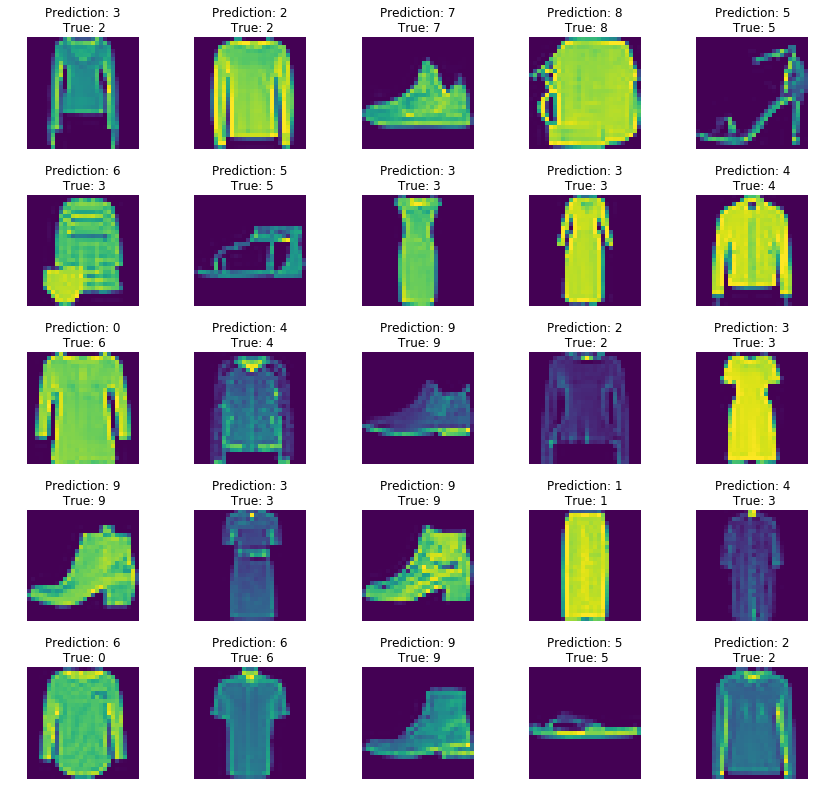

In [29]:
predictions = classifier.predict_classes(test_X)
import random

fig, axes = plt.subplots(5, 5, figsize=(14, 14))
# axes is currently in multiple lists, ravel reshapes it to 1d (?)
axes = axes.ravel()

randnum = random.randint(0, 9975)

for i in range(25):
    axes[i].imshow(test_X[randnum + i].reshape(28, 28))
    axes[i].set_title('Prediction: %d\n True: %d' %
                      (predictions[randnum + i], test_y[randnum + i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)